In [37]:
#https://app.sandbox.dea.ga.gov.au/user/erinestafford@gmail.com/lab/tree/DEA_products/DEA_Land_Cover.ipynb
import pandas as pd
#LEVEL3_COLOUR_SCHEME = {
#    0: (255, 255, 255, 255, "No Data"),
#    111: (172, 188, 45, 255, "Cultivated terrestrial vegetation"),
#    112: (14, 121, 18, 255, "Natural terrestrial vegetation"),
#    124: (30, 191, 121, 255, "Natural aquatic vegetation"),
#    215: (218, 92, 105, 255, "Artificial surface"),
#    216: (243, 171, 105, 255, "Natural bare surface"),
#    220: (77, 159, 220, 255, "Water"),
#}
df = pd.read_csv('east_coast.csv') #('classification_data.csv')
print(df)

     0.000000000000000000e+00  0.000000000000000000e+00.1  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   
..                        ...                         ...   
682                     111.0                       112.0   
683                     112.0                       112.0   
684                     112.0                       112.0   
685                     112.0                       112.0   
686                     112.0                       112.0   

     0.000000000000000000e+00.2  0.000000000000000000e+00.3  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
3              

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [39]:
df.values

array([[  0.,   0.,   0., ..., 112., 112., 112.],
       [  0.,   0.,   0., ..., 112., 112., 112.],
       [  0.,   0.,   0., ..., 112., 112., 112.],
       ...,
       [112., 112., 112., ...,   0.,   0.,   0.],
       [112., 112., 112., ...,   0.,   0.,   0.],
       [112., 112., 112., ...,   0.,   0.,   0.]])

In [40]:
#print(len(df.y.unique()))
#print(len(df.x.unique()))
classes = df.values#df.level3.values.reshape((23,21))

In [41]:
np.shape(classes)

(687, 252)

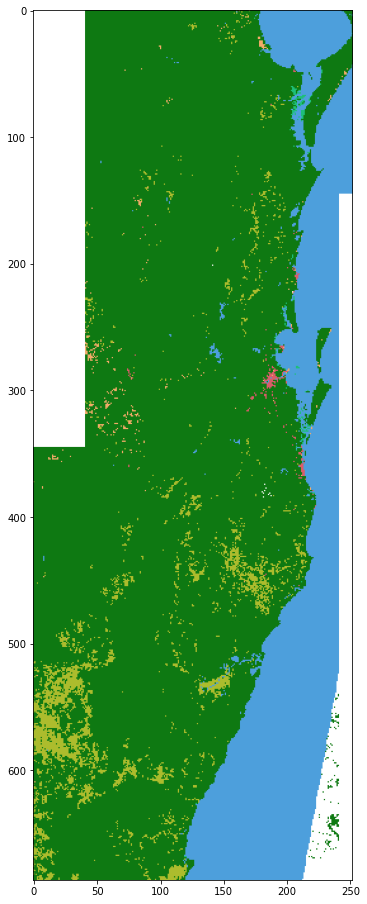

In [50]:

# define color map 
color_map = { 0: np.array([255, 255, 255]),
             111: np.array([172, 188, 45]),
             112: np.array([14, 121, 18]),
             124: np.array([30, 191, 121]),
             215: np.array([218, 92, 105]),
             216: np.array([243, 171, 105]),
             220: np.array([77, 159, 220]),
}

# make a 3d numpy array that has a color channel dimension 
data_3d = np.ndarray(shape=(classes.shape[0], classes.shape[1], 3), dtype=int)
for i in range(classes.shape[0]):
    for j in range(classes.shape[1]):
        data_3d[i][j] = color_map[classes[i][j]]

# display the plot 
fig, ax = plt.subplots(figsize = (10,16))
ax.imshow(data_3d)

plt.show()



In [46]:
data_3d.shape

(687, 252, 3)

In [49]:
# display the plot 
#fig, ax = plt.subplots()
#ax.imshow(data_3d[0:20,0:20,:])
#small_test_data=data_3d[0:20,0:20,:]

#plt.show()

In [ ]:
pairs=[[1,40],[1,1],[40,1],[40,40]]

In [30]:
classes_multi =np.zeros(classes.shape)#np.zeros((20,20))
classes_multi=classes#[0:20,0:20]
K = np.random.choice(np.arange(200,1000))
init_resources = np.random.choice(np.arange(0,K))
br = np.random.choice(np.arange(0.05,0.1,0.001))
patch_net = {}
patch_names = []
count = 0
for i in range(classes_multi.shape[0]):
    for j in range(classes_multi.shape[1]):
        patch_net[count] ={}
        patch_net[count]['patch_center']= [i+0.5,j+0.5]
        patch_net[count]['Res']=np.array([0.5,0.5])
        if classes_multi[i][j]== 111: #"Cultivated terrestrial vegetation"
            K = np.random.choice(np.arange(200,1000))
            patch_net[count]['max_cc']= K
            patch_net[count]['init_resources']= np.random.choice(np.arange(0,K))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0.05,0.1,0.001))
            patch_net[count]['Name'] = 'Orchard'
            patch_net[count]['work_type'] ='Farm'
            patch_net[count]['patch_types']= ['W']
            patch_net[count]['patch_time_distributions'] = {"W": [9, 2], "H": [0, 0], "A": [0, 0]}
        elif classes_multi[i][j]== 112: #"Natural terrestrial vegetation"
            K = np.random.choice(np.arange(200,2000))
            patch_net[count]['max_cc']= K
            patch_net[count]['init_resources']= np.random.choice(np.arange(0,K))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0,0.1,0.001))
            patch_net[count]['Name'] = 'Forest'
            patch_net[count]['work_type'] = 'Farm'
            patch_net[count]['patch_types']= ['W', 'A']
            patch_net[count]['patch_time_distributions'] = {"W": [2, 0.5], "H": [0, 0], "A": [2, 0.5]}
        elif classes_multi[i][j]== 124: #"Natural aquatic vegetation"
            K = np.random.choice(np.arange(200,3000))
            patch_net[count]['max_cc']= K
            patch_net[count]['init_resources']= np.random.choice(np.arange(0,K))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0,0.1,0.001))
            patch_net[count]['Name'] ='Water Body'
            patch_net[count]['work_type'] = 'Farm'
            patch_net[count]['patch_types']= ['W', 'A']
            patch_net[count]['patch_time_distributions'] = {"W": [2, 0.5], "H": [0, 0], "A": [2, 0.5]}
        elif classes_multi[i][j]== 215: #"Artificial surface"
            K = np.random.choice(np.arange(200,1000))
            patch_net[count]['max_cc']= K
            patch_net[count]['init_resources']= np.random.choice(np.arange(0,K))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0.1,0.5,0.001))
            patch_net[count]['Name'] ='Residential'
            patch_net[count]['work_type'] = 'Town'
            patch_net[count]['patch_types']= ['H','W', 'A']
            patch_net[count]['patch_time_distributions'] = {"W": [5, 3], "H": [9, 3], "A": [4, 1]}
        elif classes_multi[i][j]== 216: #"Natural bare surface"
            K = np.random.choice(np.arange(200,1000))
            patch_net[count]['max_cc']= K
            patch_net[count]['init_resources']= np.random.choice(np.arange(0,K))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0.1,0.5,0.001))
            patch_net[count]['Name'] ='Dump'
            patch_net[count]['work_type'] = 'Farm'
            patch_net[count]['patch_types']= ['W', 'A']
            patch_net[count]['patch_time_distributions'] = {"W": [2, 0.5], "H": [0, 0], "A": [2, 0.5]}
        elif classes_multi[i][j]== 220: #"Water"
            K = np.random.choice(np.arange(200,3000))
            patch_net[count]['max_cc']= K
            patch_net[count]['init_resources']= np.random.choice(np.arange(0,K))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0,0.1,0.001))
            patch_net[count]['Name'] ='Water Body'
            patch_net[count]['work_type']  ='Farm'
            patch_net[count]['patch_types']= ['W', 'A']
            patch_net[count]['patch_time_distributions'] = {"W": [1, 1], "H": [0, 0], "A": [3, 1]}
        else: #No Data
            patch_net[count]['max_cc']=1
            patch_net[count]['init_resources']= 0
            patch_net[count]['resource_birth'] = 0
            patch_net[count]['Res']=np.array([0,0])
            patch_net[count]['work_type'] = 'None'
            patch_net[count]['Name'] ='None'
            patch_net[count]['patch_types']= ['A']
            patch_net[count]['patch_time_distributions'] = {"W": [0, 0], "H": [0, 0], "A": [1, 0.5]}
        if [i,j] in pairs:
            patch_net[count]['Name'] ='Roost'
            print(count)
        patch_names.append(patch_net[count]['Name'])
        count = count + 1
        
count = 0

t = np.arange(365*24)


for i in range(classes_multi.shape[0]):
    for j in range(classes_multi.shape[1]):
        k1 = patch_net[count]['max_cc']
        patch_net[count]['carrying_capacity_yr'] = k1*np.cos(2*np.pi/(24*365)*t)+k1
        count=count+1
        


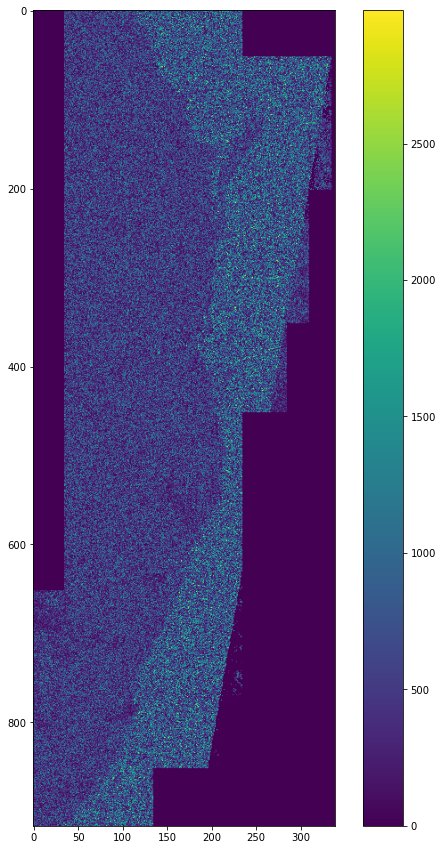

In [33]:
resources = np.asarray([patch_net[i]['init_resources'] for i in range(count)])
plt.figure(figsize=(10,15))
plt.imshow(resources.reshape(classes.shape))
plt.colorbar()

In [34]:

import pickle 

with open('au_east_coast.pkl', 'wb') as f:
    pickle.dump(patch_net, f)

In [9]:
xc = int(np.shape(classes)[0]/2)
yc = int(np.shape(classes)[1]/2)
print(xc)
print(yc)

11
10


In [8]:
xcs=[11,1,40,30]
ycs=[10,1,1,39]
pairs=[[1,40],[1,1],[40,1],[40,40]]

In [11]:
(23*2)*(21*2)

1932

In [9]:
classes_multi =np.zeros((int(classes.shape[0]*2),int(classes.shape[1]*2)))
classes_multi[:classes.shape[0], :classes.shape[1]]=classes
classes_multi[classes.shape[0]:, :classes.shape[1]]=classes
classes_multi[:classes.shape[0], classes.shape[1]:]=classes
classes_multi[classes.shape[0]:, classes.shape[1]:]=classes

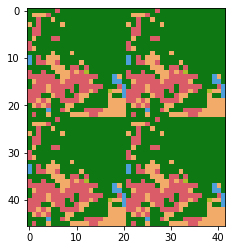

In [10]:
# make a 3d numpy array that has a color channel dimension 
data_3d = np.ndarray(shape=(classes_multi.shape[0], classes_multi.shape[1], 3), dtype=int)
for i in range(classes_multi.shape[0]):
    for j in range(classes_multi.shape[1]):
        data_3d[i][j] = color_map[classes_multi[i][j]]

# display the plot 
fig, ax = plt.subplots()
ax.imshow(data_3d)

plt.show()

In [11]:
data_3d.shape

(46, 42, 3)

In [12]:
# make patch network based on classification 
#LEVEL3_COLOUR_SCHEME = {
#    0: (255, 255, 255, 255, "No Data"),
#    111: (172, 188, 45, 255, "Cultivated terrestrial vegetation"),
#    112: (14, 121, 18, 255, "Natural terrestrial vegetation"),
#    124: (30, 191, 121, 255, "Natural aquatic vegetation"),
#    215: (218, 92, 105, 255, "Artificial surface"),
#    216: (243, 171, 105, 255, "Natural bare surface"),
#    220: (77, 159, 220, 255, "Water"),
#}
patch_net = {}
patch_names = []
count = 0
for i in range(classes_multi.shape[0]):
    for j in range(classes_multi.shape[1]):
        patch_net[count] ={}
        patch_net[count]['patch_center']= [i+0.5,j+0.5]
        patch_net[count]['Res']=np.array([0.5,0.5])
        if classes_multi[i][j]== 111: #"Cultivated terrestrial vegetation"
            K = np.random.choice(np.arange(200,1000))
            patch_net[count]['max_cc']= K
            patch_net[count]['init_resources']= np.random.choice(np.arange(0,K))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0.05,0.1,0.001))
            patch_net[count]['Name'] = 'Orchard'
        elif classes_multi[i][j]== 112: #"Natural terrestrial vegetation"
            K = np.random.choice(np.arange(200,2000))
            patch_net[count]['max_cc']= K
            patch_net[count]['init_resources']= np.random.choice(np.arange(0,K))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0,0.1,0.001))
            patch_net[count]['Name'] = 'Forest'
        elif classes_multi[i][j]== 124: #"Natural aquatic vegetation"
            K = np.random.choice(np.arange(200,3000))
            patch_net[count]['max_cc']= K
            patch_net[count]['init_resources']= np.random.choice(np.arange(0,K))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0,0.1,0.001))
            patch_net[count]['Name'] ='Water Body'
        elif classes_multi[i][j]== 215: #"Artificial surface"
            K = np.random.choice(np.arange(200,1000))
            patch_net[count]['max_cc']= K
            patch_net[count]['init_resources']= np.random.choice(np.arange(0,K))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0.1,0.5,0.001))
            patch_net[count]['Name'] ='Residential'
        elif classes_multi[i][j]== 216: #"Natural bare surface"
            K = np.random.choice(np.arange(200,1000))
            patch_net[count]['max_cc']= K
            patch_net[count]['init_resources']= np.random.choice(np.arange(0,K))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0.1,0.5,0.001))
            patch_net[count]['Name'] ='Dump'
        elif classes_multi[i][j]== 220: #"Water"
            K = np.random.choice(np.arange(200,3000))
            patch_net[count]['max_cc']= K
            patch_net[count]['init_resources']= np.random.choice(np.arange(0,K))
            patch_net[count]['resource_birth'] = np.random.choice(np.arange(0,0.1,0.001))
            patch_net[count]['Name'] ='Water Body'
        else: #No Data
            patch_net[count]['max_cc']=1
            patch_net[count]['init_resources']= 0
            patch_net[count]['resource_birth'] = 0
            patch_net[count]['Res']=np.array([0,0])
            
        if [i,j] in pairs:
            patch_net[count]['Name'] ='Roost'
            print(count)
        patch_names.append(patch_net[count]['Name'])
        count = count + 1

43
82
1681
1720


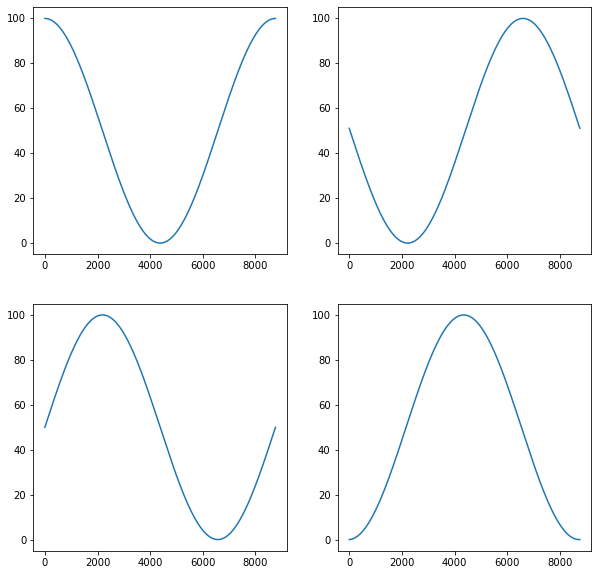

In [83]:
t = np.arange(24*365)
k1 = 50
fig,ax = plt.subplots(2,2, figsize = (10,10))
ax[0,0].plot(t, k1*np.cos(2*np.pi/(24*365)*t)+k1)
ax[0,1].plot(t, k1*np.cos((2*np.pi/(24*365))*(t+90*24))+k1)
ax[1,0].plot(t, k1*np.sin((2*np.pi/(24*365))*t)+k1)
ax[1,1].plot(t, k1*np.sin((2*np.pi/(24*365))*(t-90*24))+k1)

In [13]:
count = 0

t = np.arange(365*24)
#k1 = 50
#fig,ax = plt.subplots(2,2, figsize = (10,10))
#ax[0,0].plot(t, k1*np.cos(2*np.pi/365*t)+k1)
#ax[0,1].plot(t, k1*np.cos((2*np.pi/365)*(t+90))+k1)
#ax[1,0].plot(t, k1*np.sin((2*np.pi/365)*t)+k1)
#ax[1,1].plot(t, k1*np.sin((2*np.pi/365)*(t-90))+k1)


for i in range(classes_multi.shape[0]):
    for j in range(classes_multi.shape[1]):
        k1 = patch_net[count]['max_cc']
        patch_net[count]['carrying_capacity_yr'] = k1*np.cos(2*np.pi/(24*365)*t)+k1
        #if i < 46//2 and j<42//2:
        #    patch_net[count]['carrying_capacity_yr'] = k1*np.cos(2*np.pi/(24*365)*t)+k1
        #elif i < 46//2 and j>=42//2:
        #    patch_net[count]['carrying_capacity_yr'] = k1*np.cos((2*np.pi/(24*365))*(t+90))+k1
        #    
        #elif i >= 46//2 and j<42//2:
        #    patch_net[count]['carrying_capacity_yr'] = k1*np.sin((2*np.pi/(24*365))*t)+k1
        #    
        #elif i >= 46//2 and j>=42//2:
        #    patch_net[count]['carrying_capacity_yr'] = k1*np.sin((2*np.pi/(24*365))*(t-90))+k1

        count = count + 1

In [14]:
resources = np.asarray([patch_net[i]['init_resources'] for i in range(count)])

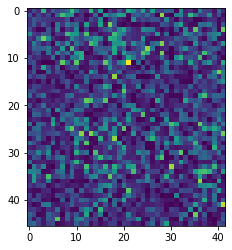

In [15]:
plt.imshow(resources.reshape(23*2,21*2))

In [16]:
import pickle 

with open('test_big_patch_net.pkl', 'wb') as f:
    pickle.dump(patch_net, f)
        
with open('test_big_patch_net.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [17]:
patch_types = ['Roost', 'Residential', 'Orchard', 'Water Body', 'Forest', 'Dump']
patch_type_dist = np.zeros(len(patch_types)-1)
for p in patch_names:
    if p=='Residential':
        patch_type_dist[0]+=1
    if p=='Orchard':
        patch_type_dist[1]+=1
    if p=='Water Body':
        patch_type_dist[2]+=1
    if p=='Forest' or p=='Roost': #because here roost is in a forest patch, but this may change for other populations
        patch_type_dist[3]+=1
    if p=='Dump':
        patch_type_dist[4]+=1

patch_probs = np.array([0.53710742, 0.26605321, 0.06561312, 0.06561312,
       0.06561313])

patch_dist = np.zeros(len(patch_names))
count = 0
for p in patch_names:
    if p=='Residential':
        patch_dist[count]=patch_probs[0]/patch_type_dist[0]
    if p=='Orchard':
        patch_dist[count]=patch_probs[1]/patch_type_dist[1]
    if p=='Water Body':
        patch_dist[count]=patch_probs[2]/patch_type_dist[2]
    if p=='Forest' or p=='Roost':
        patch_dist[count]=patch_probs[3]/patch_type_dist[3]
    if p=='Dump':
        patch_dist[count]=patch_probs[4]/patch_type_dist[4]
    count = count+1

In [18]:
with open('init_forage.pkl', 'wb') as f:
    pickle.dump(patch_dist, f)

In [19]:
test = np.arange(0,100)

In [20]:
yearly_cc=np.asarray([patch_net[i]['carrying_capacity_yr'] for i in range(count)])

In [21]:
test=np.tile(yearly_cc,2)

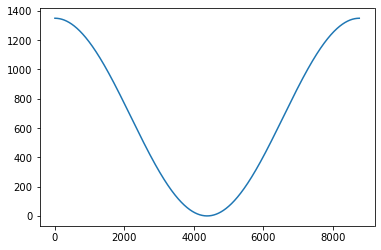

In [22]:
plt.plot(yearly_cc[0])

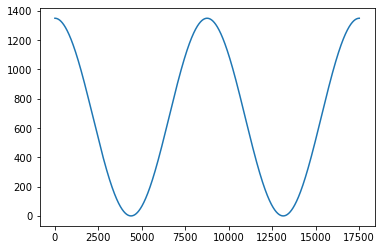

In [23]:
plt.plot(test[0])